# 데이콘 Basic Summer
## 쇼핑몰 지점별 매출액 예측 경진대회 

## 첫번째 Baseline

안녕하세요 데이커 여러분!  
데이콘 Basic Summer에 오신 것을 환영합니다.

올해도 무더운 여름이 찾아왔습니다.  
하지만 여름이라고 하면 역시 Shopping 🛒을 빼놓을 순 없겠죠! 

<img src='https://user-images.githubusercontent.com/92353013/177723710-5b62e89f-f46b-4575-b356-f2899e288017.png' align=center>

각종 미디어에 쏟아지는 여름철 프로모션과   
여름 한정 상품들을 보면 쇼핑 욕구가 마구마구 샘솟는데요.

이번에는 소비자가 아닌 판매자의 입장에서 Shopping 을 생각해봅시다!

어떤 프로모션을 진행해야 판매량이 올라갈까요?💥  
매장 주변의 날씨가 판매량에 영향을 미치지는 않을까요?🌞  
혹은 지역 사회의 실업률도 영향을 미칠 수 있지 않을까요?

------

데이콘과 함께, 초보부터 고수까지 모두가 참여하는 데이콘 Basic Summer   
**쇼핑몰 지점별 매출액 예측 경진대회**를 소개합니다.

쇼핑몰 매장별 프로모션 정보, 주변 날씨, 실업률, 연료 가격 등의 정보를 바탕으로  
쇼핑몰의 각 지점별 주간 매출액을 예측해주세요!

매출을 예측하는 간단한 대회 처럼 보이지만,   
데이터 분석을 처음 접하는 분들에게는 어디부터 시작해야 하는지 막막하실 겁니다.

데이콘이 준비한 베이스라인을 통해 데이터 분석에 입문해보세요!🥇

<p style='text-align: right;'> July, 2022 | All rights reserved by Dacon</p>

# I. 데이터 살펴보기

데이터 분석을 하기 위해 가장 먼저 해야할 일이 무엇일까요?

바로 데이터를 살펴보는 일입니다.  
주어진 데이터를 살펴보며 데이터의 모양과 대략적인 내용을 파악하고, 무슨 분석이 가능한지 확인하여 분석의 방향을 잡는 과정이 필요합니다.

대회 페이지의 [데이터] 탭에서 압축 파일을 다운받아 압축을 풀어주었다면 현재 폴더 구조는 아래와 같을 것입니다.

(현재 위치)  
- baseline.ipynb
- dataset (폴더)
  - train.csv
  - test.csv
  - sample_submission.csv

이번 대회의 데이터는 총 3가지이며 모두 csv 파일입니다.
1. train.csv : 데이터 분석 모델을 학습(train)하기 위해 사용하는 데이터
2. test.csv : 데이터 분석 모델을 통해 정답을 예측하기 위해 사용하는 데이터
3. sample_submission.csv : 예측한 정답 값을 기록하여 제출하기 위한 샘플 정답 파일

## 1. 데이터 준비

먼저 pandas 라이브러리의 `read_csv()` 함수를 이용해 분석에 사용할 데이터를 불러옵니다.

`read_csv()` 함수는 ('파일이 있는 위치/파일명.확장자명') 의 형식을 받아 데이터를 불러옵니다.

In [1]:
# 데이터를 불러오고 살펴보기 위한 pandas 라이브러리
import pandas as pd

# train 데이터 불러오기
train = pd.read_csv('dataset/train.csv')

# test 데이터 불러오기
test = pd.read_csv('dataset/test.csv')

# sample_submission 불러오기
sample_submission = pd.read_csv('dataset/sample_submission.csv')

In [2]:
# 잘 불러와졌는지 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


## 2. 데이터 확인

이제 데이터가 어떻게 생겼는지 살펴봅시다.

처음 데이터를 살펴 볼 때에는 pandas의 **head()**, **tail()** 그리고 **info()** 메소드를 활용하여 데이터를 살펴보는 경우가 많습니다.

이는 데이터와 처음과 끝을 살펴봄으로서, **이상치나 결측치**와 같은 데이터를 살펴보기 위함입니다.

```
1. train.csv : 학습 데이터
id : 샘플 아이디
Store : 쇼핑몰 지점
Date : 주 단위(Weekly) 날짜
Temperature : 해당 쇼핑몰 주변 기온
Fuel_Price : 해당 쇼핑몰 주변 연료 가격
Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
Unemployment : 해당 쇼핑몰 지역의 실업률
IsHoliday : 해당 기간의 공휴일 포함 여부
Weekly_Sales : 주간 매출액 (목표 예측값)


2. test.csv : 테스트 데이터
id : 샘플 아이디
Store : 쇼핑몰 지점
Date : 주 단위(Weekly) 날짜
Temperature : 해당 쇼핑몰 주변 기온
Fuel_Price : 해당 쇼핑몰 주변 연료 가격
Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보
Unemployment : 해당 쇼핑몰 지역의 실업률
IsHoliday : 해당 기간의 공휴일 포함 여부


3. sample_submission.csv : 제출 양식
id : 샘플 아이디
Weekly_Sales : 주간 매출액 (목표 예측값)
```

In [3]:
# 데이터를 살펴보기 위해 데이터 최상단의 5줄을 표시합니다.
train.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68


In [4]:
# 데이터를 살펴보기 위해 데이터 최하단의 5줄을 표시합니다.
train.tail()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20
6254,6255,45,28/09/2012,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,8.684,False,713173.95


데이터 칼럼을 살펴보니 id, store, date 등 총 13 개의 칼럼이 있네요.

얼핏보니 store는 1~45, date는 2010 5월 ~ 2012 9월까지 있는 듯 합니다.  
weekly_sale을 보니 store간 차이가 좀 있을 수 있겠다는 생각도 드네요.

In [5]:
# 데이터 결측치 및 변수들의 타입 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB


Non-Null Count 부분을 보니 promotion 부분에 결측치가 있다는 것을 알 수 있습니다.

date, isholiday 부분은 숫자가 아니기 때문에 분석 전에 데이터 전처리가 필요하겠네요.

## 3. 데이터 시각화

간단하게 그래프를 그려 데이터를 확인합니다.

시각화를 위해 `matplotlib` 라이브러리를 사용합니다.

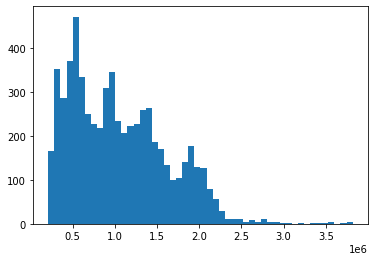

In [5]:
import matplotlib.pyplot as plt

# 이번엔 예측하고자 하는 값인 Weekly_Sales를 확인해봅니다.
plt.hist(train.Weekly_Sales, bins=50)
plt.show()

일부 특이값들을 빼면 대부분 값이 작은 쪽에 몰려있는 모습을 보입니다.

## II. 데이터 전처리

데이터를 정확하게 분석하기 위해서는 먼저 데이터에 여러가지 처리를 해주어야 합니다.

데이터를 분석이 가능하도록 전처리 하는 과정, 데이터를 합치거나 나눠서 더 정확한 정보를 갖도록 하는 과정 등이 필요합니다.

전처리는 왜 필요한 것일까요?  
데이터를 계산하는 컴퓨터는 오로지 숫자만을 인식하기 때문입니다.

그래서 사람이 사용하는 한국어, 영어와 같은 문자, 년월일 같은 날짜, 그리고 비어있는 값 (결측치)를 숫자로 변경해주어야 합니다.

이 데이터에서는 결측치, Date, Isholyday에 대해서 전처리가 필요하겠네요

### 1. 결측치(NA) 처리

결측치란 관측되지 않아 아무것도 없는 공간(Not Available)으로 되어있는 데이터입니다.

이 부분을 무엇인가로 채워주어야 분석을 진행할 수 있습니다.

이번에는 간단하게 숫자 0 으로 빈 부분을 채워주겠습니다.

In [6]:
# pandas의 fillna(0) 메소드를 활용합니다.
train = train.fillna(0)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


Promotion1~5 에 보이던 NA 값들이 0.00으로 채워진 것을 확인할 수 있습니다.

### 2. Date 전처리

Date 칼럼은 날짜 정보를 담고 있습니다.

날짜는 겉으로 보기엔 숫자로 이루어져 있는 것 같지만  
위의 출력 결과에서 볼 수 있다 시피 "31/08/2012" 형태의 문자로 이루어져 있습니다.

따라서 분석을 위해서는 "일/월/년도" 형식의 문자를 숫자로 변환해주어야 합니다.

이번 baseline에서는 이 중 "월" 정보만 사용하도록 하겠습니다.  
"월"은 "31/08/2012" 형태의 값 중 4번째~5번째 글자네요.

In [7]:
# Date 칼럼에서 "월"에 해당하는 정보만 추출하여 숫자 형태로 반환하는 함수를 작성합니다.
def get_month(date):
    month = date[3:5]
    month = int(month)
    return month

# 이 함수를 Date 칼럼에 적용한 Month 칼럼을 만들어줍니다.
train['Month'] = train['Date'].apply(get_month)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9


"월"에 대한 정보만을 담고 있는 Month 칼럼이 잘 생성된 것을 확인할 수 있습니다.

### 3. IsHoliday 전처리

Date 칼럼은 휴일 정보를 담고 있습니다.

값은 휴일인 경우 True , 휴일이 아닌 경우 False 값을 갖습니다.

파이썬에서는 True 는 1로, False는 0으로 해석하기 때문에 굳이 전처리를 해주지 않아도 분석을 진행하는 데에는 문제가 없습니다.

하지만 공부하는 겸 전처리를 해보도록 하죠!

In [8]:
# IsHoliday 칼럼의 값을 숫자 형태로 반환하는 함수를 작성합니다.
def holiday_to_number(isholiday):
    if isholiday == True:
        number = 1
    else:
        number = 0
    return number

# 이 함수를 IsHoliday 칼럼에 적용한 NumberHoliday 칼럼을 만들어줍니다.
train['NumberHoliday'] = train['IsHoliday'].apply(holiday_to_number)

# 결과를 확인합니다.
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,NumberHoliday
0,1,1,05/02/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,8.106,False,1643690.90,2,0
1,2,1,12/02/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,8.106,True,1641957.44,2,1
2,3,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,8.106,False,1611968.17,2,0
3,4,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,8.106,False,1409727.59,2,0
4,5,1,05/03/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,8.106,False,1554806.68,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87,8,0
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66,9,1
6252,6253,45,14/09/2012,67.87,3.948,11407.95,0.00,4.30,3421.72,5268.92,8.684,False,702238.27,9,0
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20,9,0


성공적으로 전처리가 완료된 모습을 확인할 수 있습니다.

이제 같은 내용을 test set에도 적용해줍니다.

In [9]:
# 결측치 처리
test = test.fillna(0)

# Date 전처리
test['Month'] = test['Date'].apply(get_month)

# IsHoliday 전처리
test['NumberHoliday'] = test['IsHoliday'].apply(holiday_to_number)

# III. Modeling

이제 전처리가 완료된 데이터를 사용하여 분석 모델을 학습시키고 예측 결과를 만들어보겠습니다.

## 1. 모델 선택

이번 프로젝트에서 사용할 모델은 **선형 회귀(Linear Regression)** 모델입니다.  

### 선형 회귀란?

선형 회귀란 예측하고자 하는 종속 변수 y와 독립 변수 x의 관계를 가장 잘 나타내는 선(Line)을 구하는 회귀분석 방법입니다.

<div style="text-align : center;">
<img src="https://user-images.githubusercontent.com/92353013/177723868-ec527a25-3dcf-4f5c-b369-611f9704e500.png">

<font color="gray"> Image By Amatulic (same as Anachronist on Wikimedia) </font>
</div>

위 그래프에서 파란색 선 (Linear regression)은 빨간색 점 (Data points)들이 보여주는 x와 y의 관계를 잘 나타내고 있습니다. 

우리는 이처럼 선형 회귀 분석을 통해 x 값이 증가할수록 y 값도 증가한다는 상관 관계를 확인할 수 있으며, 새로운 x 값이 등장했을 때에도 그 x 값에 해당하는 y 값이 어디 쯤에 위치할 지 어느정도 예측할 수 있게 됩니다.

회귀 선을 구하기 위해서는 Normal Equation, Gradient Descent 등의 방법이 있지만 이는 이번에 다루기엔 너무 어려운 내용이기 때문에 다루지 않겠습니다.

이번 과정에서는 `sklearn` 패키지를 이용해 간단하게 선형회귀를 사용해보도록 하겠습니다.

우선 설정한 **모델을 선언**해 주도록 해요.

In [20]:
from sklearn.linear_model import LinearRegression

# 모델 선언
model = LinearRegression()

## 2. 학습/예측 

이제 선안한 모델을 사용하여 학습과 예측을 진행하겠습니다.

학습이란 모델이 데이터를 바탕으로 데이터들 사이의 관계를 파악하는 과정입니다.

예측이란 학습을 통해 파악한 데이터 사이의 관계를 이용해 새로운 데이터에 대한 값을 추측하는 것입니다.

먼저 분석에 사용할 데이터들만 추려주도록 합니다.

In [18]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])

# 전처리 하기 전 칼럼들을 제거합니다.
train = train.drop(columns=['Date','IsHoliday'])
test = test.drop(columns=['Date','IsHoliday'])

# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
x_train = train.drop(columns=['Weekly_Sales'])
y_train = train[['Weekly_Sales']]

이제 모델 학습을 시작합니다.

`sklearn`을 이용해 선언된 모델은 `fit()` 메소드를 이용해 간단하게 **모델을 학습** 시킬 수 있어요.

In [21]:
# 모델 학습
model.fit(x_train,y_train)

LinearRegression()

모델 학습이 굉장히 간단하게, 또 빠르게 끝난 것을 확인할 수 있습니다.

다루는 데이터의 양이 많아지면 모델 학습이 오래 걸릴 수도 있어요!

이번엔 학습된 모델을 이용해 평가 데이터셋의 예측값을 구해봅시다.

`sklearn`을 이용해 선언된 모델은 **predict()** 메소드를 이용해 간단하게 **결과값을 예측**할 수 있어요.

In [23]:
# 학습된 모델을 이용해 결과값 예측후 상위 10개의 값 확인
prediction = model.predict(test)
print('----------------------예측된 데이터의 상위 10개의 값 확인--------------------\n')
print(prediction[:10])

----------------------예측된 데이터의 상위 10개의 값 확인--------------------

[[1481332.55782775]
 [1461330.08031011]
 [1387783.09207983]
 [1389854.53005948]
 [1443978.94274372]
 [1514601.15440919]
 [1416193.17838576]
 [1439121.74595411]
 [1334090.21769005]
 [1324831.19678272]]


# IV. 데이콘 제출하기


## 1. submission 파일 생성

이제 예측한 값을 **sample_submission.csv**에 넣어 제출용 파일을 생성해봅시다.

In [24]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = prediction

# 정답파일 데이터프레임 확인
sample_submission.head()

,id,Weekly_Sales
0,1,1.481333e+06
1,2,1.461330e+06
2,3,1.387783e+06
3,4,1.389855e+06
4,5,1.443979e+06


In [ ]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('submission.csv',index = False)

## 2. 데이콘 페이지 제출
다음으로, 실제 데이콘 홈페이지에서 제출해보도록 하겠습니다.

이 과정을 통해 우리의 모델이 목표로 하는 데이터에 대해 어느 정도의 성능을 가지는지, 다른 사람들은 어느 정도의 성능을 얻었는지 확인할 수 있습니다.

<img src='https://user-images.githubusercontent.com/92353013/177723966-77b77340-c0f6-4873-95fc-9eb8c3812700.png'>

1. 먼저 대회 페이지에서 제출 탭의 버튼을 누르면 파일 업로드 화면으로 전환됩니다.

2. 전환된 화면에서 서류모양 아이콘을 클릭하여 제출할 파일을 선택하거나 파일을 마우스로 끌어와 서류모양 아이콘 위에 던져두면 파일을 업로드 할 수 있습니다.

3. 업로드가 완료되었다면 까만색 제출 버튼을 클릭합니다.

제출이 완료되었다면 [리더보드] 탭으로 이동하여 자신의 순위가 어디인지 확인해보세요!

그리고 자신만의 코드를 통해 어디까지 올라갈 수 있는지, 함꼐 해봐요! :]

# V. 마치며

<img src='https://user-images.githubusercontent.com/92353013/177723980-8d4c4662-9ba7-4834-9827-0b88824480fb.png'>

여러분은 방식으로 분석을 진행하셨나요?

이번 Baseline을 통해 어떤 방식으로 분석을 진행해야겠다는 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 분석을 진행하시고 코드공유에 올려주세요!

데이콘 스쿨 장학금, 스타벅스 기프티콘, 데이콘 굿즈 등 특별한 선물이 기다립니다!

---

In [2]:
# [해결] The save operation succeeded, but the notebook does not appear to be valid. The validation error was:
# 외부 파일의 셀을 복사해왔을 때 혹은 다른 사람이 작성한 Notebook 파일을 다운로드 받아 사용할 때, 자주 발생하는 문제

!pip install nbformat

In [3]:
!pip install -U nbformat

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.


  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.0.5
    Uninstalling traitlets-5.0.5:
      Successfully uninstalled traitlets-5.0.5
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.1.3
    Uninstalling nbformat-5.1.3:
      Successfully uninstalled nbformat-5.1.3
